<a href="https://colab.research.google.com/github/syedaftab-dev/Machine-learning/blob/main/2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support vector regresion implementation**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# total_bill -> dependent feature and all other are independent features

In [38]:
df.info() # sex,smoker,dar,time etc are categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [39]:
df['sex'].value_counts()

,count
sex,
Male,157
Female,87


In [40]:
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [41]:
df['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


In [42]:
 df['time'].value_counts()

,count
time,
Dinner,176
Lunch,68


## Feature Encoding
1. label encoding -> 2 categorical classes
ex. change sex-male to 1 and female to 0
2. Onehot encoding -> >2 categorical classes

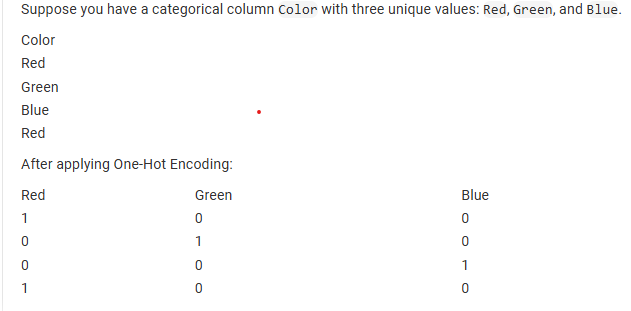

In [43]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [44]:
## idepedndent and dependent feature

X = df[[ 'tip', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['total_bill']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [46]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,Male,Yes,Sat,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
68,2.01,Male,No,Sat,Dinner,2
184,3.00,Male,Yes,Sun,Dinner,2


In [47]:
# feature encoding

# 1 - label encoding

from sklearn.preprocessing import LabelEncoder

In [48]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()

In [49]:
import warnings
warnings.filterwarnings('ignore')

X_train['sex'] = le1.fit_transform(X_train['sex'])
X_train['smoker'] = le2.fit_transform(X_train['smoker'])
X_train['time'] = le3.fit_transform(X_train['time'])

X_test['sex'] = le1.transform(X_test['sex'])
X_test['smoker'] = le2.transform(X_test['smoker'])
X_test['time'] = le3.transform(X_test['time'])

In [50]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,1,1,Sat,0,2
1,1.66,1,0,Sun,0,3
2,3.50,1,0,Sun,0,3
68,2.01,1,0,Sat,0,2
184,3.00,1,1,Sun,0,2


In [51]:
# onehot encoding with columnTrnaformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

OneHOt Encoding
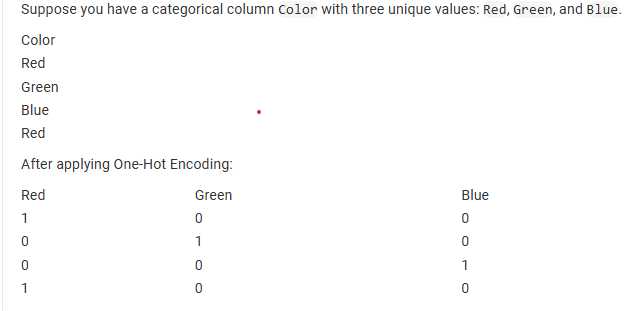

In [52]:
# for column day
ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),[3])],remainder='passthrough')
# drop->first -> day record ko drop kardega
# [3] -> index of column we want to encode
# remainder-'passthrough  (Jo baaki columns hain, unko waise ka waise chhod do.)

In [53]:
# to see whole dataset
import sys
np.set_printoptions(threshold=sys.maxsize)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [54]:
X_test

array([[0.  , 1.  , 0.  , 2.  , 0.  , 0.  , 0.  , 3.  ],
       [1.  , 0.  , 0.  , 3.21, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.  , 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.76, 1.  , 1.  , 0.  , 4.  ],
       [1.  , 0.  , 0.  , 2.09, 1.  , 1.  , 0.  , 2.  ],
       [0.  , 0.  , 1.  , 5.  , 1.  , 1.  , 1.  , 2.  ],
       [0.  , 1.  , 0.  , 3.51, 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 5.16, 1.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 5.  , 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.6 , 1.  , 0.  , 0.  , 3.  ],
       [0.  , 1.  , 0.  , 5.65, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.5 , 0.  , 1.  , 0.  , 3.  ],
       [0.  , 0.  , 1.  , 1.44, 1.  , 0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  , 3.09, 0.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 0.  , 0.  , 4.  ],
       [0.  , 0.  , 1.  , 1.36, 0.  , 0.  , 1.  , 3.  ],
       [0.  , 0.  , 1.  , 2.  , 0.  , 0.  , 1.  , 2.  ],
       [0.  , 0.  , 1.  , 1.68,

## Lets apply SV regression


In [55]:
from sklearn.svm import SVR
svr = SVR()

In [56]:
svr.fit(X_train,y_train)

SVR()

In [57]:
y_pred = svr.predict(X_test)

In [58]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))


0.46028114561159283
4.1486423210190235


Hyperparameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.001,0.0001],
    'kernel':['rbf']
}



In [60]:
grid = GridSearchCV(svr,param_grid,refit=True,verbose=3)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.145 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.025 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.089 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.013 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.021 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.124 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.050 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [63]:
grid_predict = grid.predict(X_test)

In [64]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [65]:
print(r2_score(y_test,grid_predict))
print(mean_absolute_error(y_test,grid_predict))

0.5081618245078687
3.8685147526100234
